In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

# Import from Surprise 
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline, SVD
import warnings

In [2]:
df= pd.read_csv('amazon_co-ecommerce_sample.csv')
df

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop R

In [3]:
print(df.columns)
print(df.shape)
print(df.info)
print(df.dtypes)

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers'],
      dtype='object')
(10000, 17)
<bound method DataFrame.info of                                uniq_id  \
0     eac7efa5dbd3d667f26eb3d3ab504464   
1     b17540ef7e86e461d37f3ae58b7b72ac   
2     348f344247b0c1a935b1223072ef9d8a   
3     e12b92dbb8eaee78b22965d2a9bbbd9f   
4     e33a9adeed5f36840ccc227db4682a36   
...                                ...   
9995  44d6967f083825a5de36ad4865a65bcd   
9996  08f0747b6fc6687215ffb994c3a6fb32   
9997  bf6cc073f8f24e6e338190fa16f6ee9d   
9998  cd783d0b8b44e631b9788b203eaaefae   
9

In [4]:
df.isnull()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,True,False,False,False,True,True,False,True
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
9996,False,False,False,False,True,False,False,False,False,False,True,False,True,False,True,False,True
9997,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
9998,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False


In [5]:
df['price'] = df['price'].replace({'\£':''}, regex = True)
df

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,

In [25]:
df['price'] = df['price'].replace({'\,':''}, regex = True)
df

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,

In [6]:
df.loc[df['price']=='269.00 - 699.99']

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
1655,3bb2faa80ba22fab508a70d9496f9bf7,Bestway Steel Pro Frame Set Above Ground Pool,Bestway,269.00 - 699.99,NaN,1,1.0,5.0 out of 5 stars,NaN,http://www.amazon.co.uk/Bestway-Steel-Frame-Ab...,Product Description Bestway 18ft Steel Pro Fra...,NaN,Product Description Bestway 18ft Steel Pro Fra...,http://www.amazon.co.uk/Bestway-Steel-Frame-Ab...,NaN,Five Stars // 5.0 // 26 Dec. 2014 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""Playtimes"", ""Se..."


In [7]:
df.loc[df['price']=='6.99 - 10.49']

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
1801,fbbd2167a1af1876a853b4a2e085a856,ILOVEFANCYDRESS® LADIES FLAPPER FANCY DRESS CO...,ILOVEFANCYDRESS,6.99 - 10.49,NaN,149,NaN,4.4 out of 5 stars,Fancy Dress > Accessories > Sets & Kits,http://www.amazon.co.uk/FLAPPER-COSTUME-FEATHE...,ADULTS FLAPPER FANCY DRESS COSTUME IN APPROX S...,NaN,ADULTS FLAPPER FANCY DRESS COSTUME IN APPROX S...,NaN,NaN,FAB OUTFIT // 5.0 // 10 Jun. 2014 // By\n \...,NaN


In [8]:
df.loc[df['price']=='22.39 - 41.23']

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
1808,e429e677677a754741ef6c75141cb4f2,TAVERN WENCH ADULT FANCY DRESS COSTUME LADIES ...,Sancto,22.39 - 41.23,NaN,6,1.0,4.3 out of 5 stars,Fancy Dress > Accessories > Sets & Kits,http://www.amazon.co.uk/Ladies-Oktoberfest | h...,NaN,NaN,NaN,NaN,NaN,returns difficulty // 4.0 // 17 Nov. 2012 // B...,"{""seller""=>[{""Seller_name_1""=>""Character Fancy..."


In [9]:
df.loc[df['price']=='25.34 - 56.44']

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
1814,52de34eff5c983e74c2cd3be60bb76cf,HEAVY FABRIC CARDINAL FANCY DRESS COSTUME MENS...,Sancto,25.34 - 56.44,NaN,5,3.0,4.6 out of 5 stars,Fancy Dress > Costumes > Adults,http://www.amazon.co.uk/Boland-83852-Adult-Car...,"Heavy Fabric Cardinal Costume Includes Tunic, ...",NaN,"Heavy Fabric Cardinal Costume Includes Tunic, ...",NaN,NaN,Very good if you are very tall // 5.0 // 15 Ju...,"{""seller""=>[{""Seller_name_1""=>""Scherzwelt"", ""S..."


In [10]:
df.loc[df['price']=='9.95 - 16.95']

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
3178,58f68b5d440489e0582a1e40ebd3fac0,MEN'S HORROR FILM SCREAMER HALLOWEEN FANCY DRE...,Wicked,9.95 - 16.95,NaN,1,2.0,5.0 out of 5 stars,Fancy Dress > Costumes > Adults,http://www.amazon.co.uk/CHILDS-JOSEPH-NATIVITY...,Hooded robe with mask & belt,NaN,Hooded robe with mask & belt,NaN,NaN,Five Stars // 5.0 // 26 Nov. 2014 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""Party Central"",..."


In [11]:
df.loc[df['price']=='39.94 - 76.46']

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
1837,6fdbfde4f2bc42a4671164f418066ca2,Mr Incredible - Adult Fancy Dress Costume,RUBBIES FRANCE,39.94 - 76.46,NaN,15,1.0,4.7 out of 5 stars,Fancy Dress > Accessories > Sets & Kits,http://www.amazon.co.uk/Mr-Incredible | http:/...,Includes a one piece long sleeved red jumpsuit...,NaN,Includes a one piece long sleeved red jumpsuit...,NaN,NaN,Great costume // 5.0 // 10 Oct. 2009 // By\n ...,NaN


In [12]:
df.loc[df['price']=='12.60 - 16,268.00']

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
3193,f2c35a30d2c363d09d0a6b26106f1693,Morhsuits Childrens Mr Block Head Costume,Morphsuits,"12.60 - 16,268.00",NaN,9,12.0,4.4 out of 5 stars,NaN,http://www.amazon.co.uk/Morphsuits | http://ww...,Childrens Novelty Lego Mr Blockhead Morphsuits...,NaN,Childrens Novelty Lego Mr Blockhead Morphsuits...,NaN,NaN,blockhead // 5.0 // 19 Oct. 2015 // By\n \n...,NaN


In [13]:
df.loc[df['price']=='23.94 - 46.50']

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
3235,cb7e11d70bebee92013e45699700fc39,Smiffy's Roman Warrior Deluxe Costume,Smiffy's,23.94 - 46.50,NaN,4,1.0,4.3 out of 5 stars,Fancy Dress > Costumes,http://www.amazon.co.uk/Gladiator-Costume-Expr...,"Deluxe Roman Warrior Costume with Grey, Red an...",NaN,"Deluxe Roman Warrior Costume with Grey, Red an...",NaN,NaN,good cheap fun // 4.0 // 12 Sept. 2011 // By\n...,"{""seller""=>[{""Seller_name_1""=>""Fancy Dress Cas..."


In [14]:
df.loc[df['price']=='12.94 - 24.95']

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
3255,77734dc0a03a259c9f117eaebdf2cc1a,Native Indian Man Costume,Wicked,12.94 - 24.95,NaN,4,2.0,5.0 out of 5 stars,Fancy Dress > Costumes > Adults,http://www.amazon.co.uk/Indian-Headress-Sittin...,This American Indian men's fancy dress costume...,NaN,This American Indian men's fancy dress costume...,NaN,NaN,Great outfit at a great price // 5.0 // 26 Aug...,"{""seller""=>[{""Seller_name_1""=>""Fancy Dress Dis..."


In [15]:
df.loc[df['price']=='22.00 - 43.99']

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
3258,2f846a8dc2327760795dd11b4621d5c5,TAVERN WENCH ADULT FANCY DRESS COSTUME LADIES ...,Sancto,22.00 - 43.99,NaN,6,2.0,4.3 out of 5 stars,Fancy Dress > Costumes > Adults,http://www.amazon.co.uk/PLUSH-COW-HOODED-PONCH...,NaN,NaN,NaN,NaN,NaN,returns difficulty // 4.0 // 17 Nov. 2012 // B...,"{""seller""=>[{""Seller_name_1""=>""BuySend"", ""Sell..."


In [16]:
df.loc[df['price']=='10.94 - 34.35']

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
3263,26e5b5d8c07ce2a62da31e00eaea420d,Ladies retro go go girl dressing up 60's costu...,Wicked,10.94 - 34.35,NaN,1,1.0,5.0 out of 5 stars,Fancy Dress > Costumes > Kids & Toddlers,http://www.amazon.co.uk/FANCY-DRESS-disco-HIPP...,Comes in it's own reusable zip up suit carrier...,NaN,Comes in it's own reusable zip up suit carrier...,NaN,NaN,Good fit for 11teens! // 5.0 // 9 July 2013 //...,"{""seller""=>[{""Seller_name_1""=>""FancyDressForAl..."


In [17]:
df.loc[df['price']=='5.42 - 34.99']

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
3268,74127d79e9eaedd82f461354e6567ae5,Adult Little Miss Chatterbox Morph Fancy Dress...,Morph Costumes,5.42 - 34.99,NaN,3,1.0,5.0 out of 5 stars,Fancy Dress > Costumes > Adults,http://www.amazon.co.uk/Costume-Morphsuits | h...,"If people accuse you of talking too much, prov...",NaN,"If people accuse you of talking too much, prov...",NaN,NaN,Little miss chatterbox // 5.0 // 2 Jan. 2016 /...,NaN


In [21]:
df.loc[df['price']=='22.46 - 71.01']

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
3296,7ecc73adb5353f3d6107900684fe6e80,1950s Sweetheart Plus Size Womens Fancy Dress ...,California Costume,22.46 - 71.01,NaN,2,1.0,4.0 out of 5 stars,Fancy Dress > Costumes > Adults,http://www.amazon.co.uk/1950s-Rock-Women-Fancy...,For the fuller figured lady looking for a 50s ...,NaN,For the fuller figured lady looking for a 50s ...,NaN,NaN,3xl no good for Apple // 3.0 // 28 Aug. 2015 /...,NaN


In [22]:
df.drop([3296],inplace=True)

In [23]:
df['price'] = df['price'].str.split('-').str[0]

In [19]:
df=df.drop([1655,1801,1808,1814,1837,3178,3193,3235,3255,3258,3263,3268])

In [26]:
df['price'] = df['price'].astype(float)

In [27]:
df['average_review_rating'] = df['average_review_rating'].str.extract(r'(\d+)', expand=False)
df

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15,1.0,4,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,NaN,2,1.0,4,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2 new,17,2.0,3,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,NaN,1,2.0,5,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,NaN,3,2.0,4,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5 new,3,3.0,5,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,39.99,NaN,1,3.0,4,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3 new,1,3.0,5,Novelty & Special Use > Novelty > Accessories ...,NaN,*Includes 1x Badge wi

In [28]:
df['number_available_in_stock'] = df['number_available_in_stock'].str.extract(r'(\d+)', expand=False)
df

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5,15,1.0,4,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.99,NaN,2,1.0,4,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17,2.0,3,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,NaN,1,2.0,5,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,NaN,3,2.0,4,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5,3,3.0,5,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,39.99,NaN,1,3.0,4,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3,1,3.0,5,Novelty & Special Use > Novelty > Accessories ...,NaN,*Includes 1x Badge with holder and ch

In [30]:
df = df.fillna(0)

In [31]:
df.isnull().sum()

uniq_id                                        0
product_name                                   0
manufacturer                                   0
price                                          0
number_available_in_stock                      0
number_of_reviews                              0
number_of_answered_questions                   0
average_review_rating                          0
amazon_category_and_sub_category               0
customers_who_bought_this_item_also_bought     0
description                                    0
product_information                            0
product_description                            0
items_customers_buy_after_viewing_this_item    0
customer_questions_and_answers                 0
customer_reviews                               0
sellers                                        0
dtype: int64

In [32]:
s=df['average_review_rating']
s

0       4
1       4
2       3
3       5
4       4
       ..
9995    5
9996    4
9997    5
9998    5
9999    4
Name: average_review_rating, Length: 9987, dtype: object

In [33]:
pd.to_numeric(s)

0       4
1       4
2       3
3       5
4       4
       ..
9995    5
9996    4
9997    5
9998    5
9999    4
Name: average_review_rating, Length: 9987, dtype: int64

In [34]:
pd.to_numeric(s, errors='coerce')

0       4
1       4
2       3
3       5
4       4
       ..
9995    5
9996    4
9997    5
9998    5
9999    4
Name: average_review_rating, Length: 9987, dtype: int64

In [35]:
pd.to_numeric(s, errors='ignore')

0       4
1       4
2       3
3       5
4       4
       ..
9995    5
9996    4
9997    5
9998    5
9999    4
Name: average_review_rating, Length: 9987, dtype: int64

In [36]:
df=df.apply(pd.to_numeric, errors='ignore')

In [38]:
df.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
price                                          float64
number_available_in_stock                        int64
number_of_reviews                               object
number_of_answered_questions                   float64
average_review_rating                            int64
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
description                                     object
product_information                             object
product_description                             object
items_customers_buy_after_viewing_this_item     object
customer_questions_and_answers                  object
customer_reviews                                object
sellers                                         object
dtype: object

In [41]:
df['number_of_reviews']=df['number_of_reviews'].str.replace(',','')


In [42]:
v=df['number_of_reviews']
pd.to_numeric(v)
pd.to_numeric(v, errors='coerce')
pd.to_numeric(v, errors='ignore')
df=df.apply(pd.to_numeric, errors='ignore')

In [43]:
df.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
price                                          float64
number_available_in_stock                        int64
number_of_reviews                              float64
number_of_answered_questions                   float64
average_review_rating                            int64
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
description                                     object
product_information                             object
product_description                             object
items_customers_buy_after_viewing_this_item     object
customer_questions_and_answers                  object
customer_reviews                                object
sellers                                         object
dtype: object

In [44]:
df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers'],
      dtype='object')

In [48]:
df.describe()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating
count,9987.000000,9987.000000,9969.000000,9987.000000,9987.000000
mean,17.342355,5.945429,9.131207,1.694002,4.504756
std,43.430530,8.363771,33.720434,2.467024,0.539128
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.635000,1.000000,1.000000,1.000000,4.000000
50%,8.580000,3.000000,2.000000,1.000000,5.000000
75%,17.990000,7.000000,6.000000,2.000000,5.000000
max,2439.920000,92.000000,1399.000000,39.000000,5.000000


In [50]:
df.isnull().sum()

uniq_id                                         0
product_name                                    0
manufacturer                                    0
price                                           0
number_available_in_stock                       0
number_of_reviews                              18
number_of_answered_questions                    0
average_review_rating                           0
amazon_category_and_sub_category                0
customers_who_bought_this_item_also_bought      0
description                                     0
product_information                             0
product_description                             0
items_customers_buy_after_viewing_this_item     0
customer_questions_and_answers                  0
customer_reviews                                0
sellers                                         0
dtype: int64

In [51]:
df = df.fillna(0)

In [52]:
df.isnull().sum()

uniq_id                                        0
product_name                                   0
manufacturer                                   0
price                                          0
number_available_in_stock                      0
number_of_reviews                              0
number_of_answered_questions                   0
average_review_rating                          0
amazon_category_and_sub_category               0
customers_who_bought_this_item_also_bought     0
description                                    0
product_information                            0
product_description                            0
items_customers_buy_after_viewing_this_item    0
customer_questions_and_answers                 0
customer_reviews                               0
sellers                                        0
dtype: int64

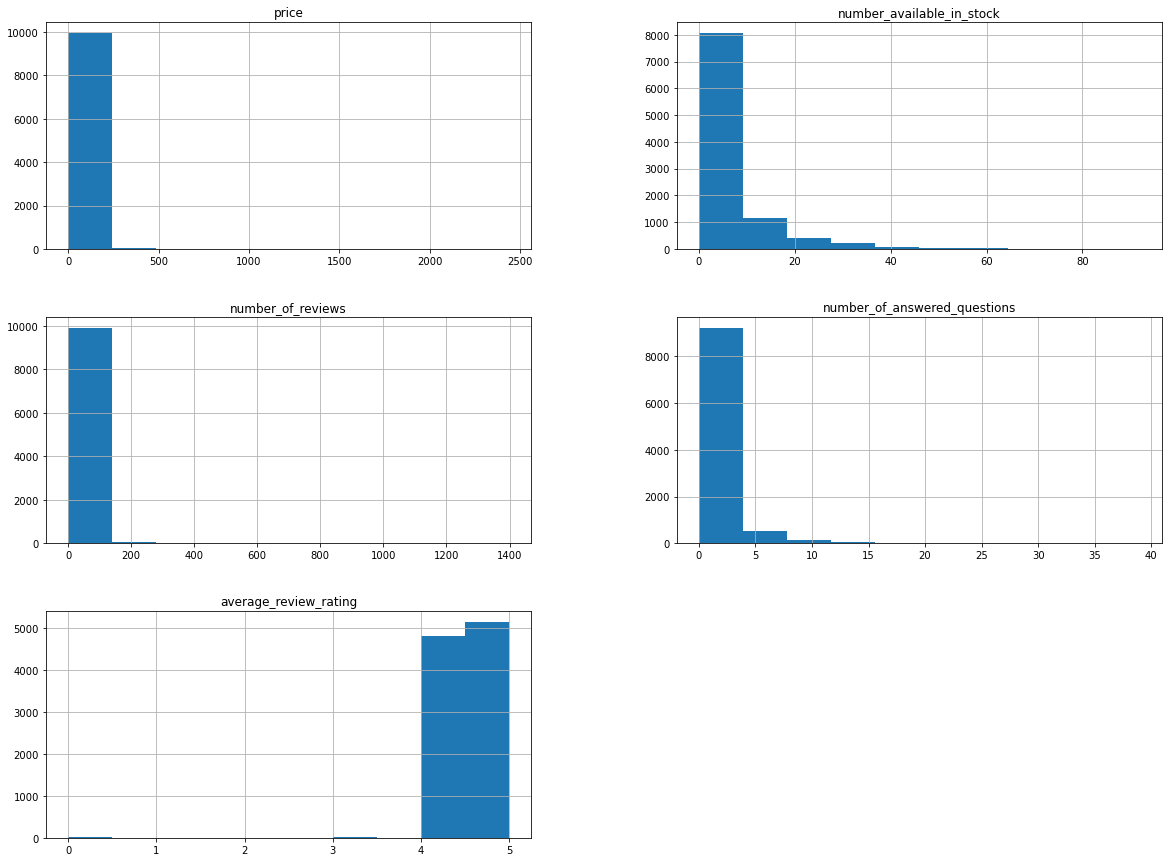

In [53]:
df.hist(figsize=(20, 15))
plt.show()

<AxesSubplot:ylabel='average_review_rating'>

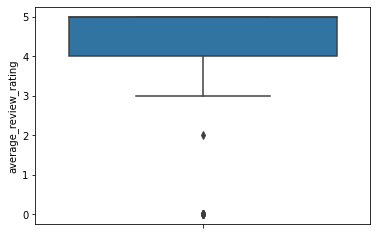

In [56]:
sns.boxplot(y='average_review_rating',data=df)

<AxesSubplot:ylabel='price'>

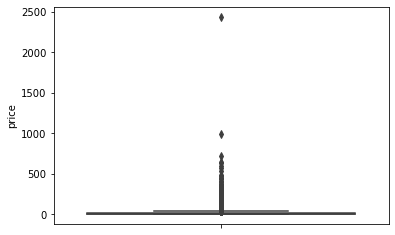

In [57]:
sns.boxplot(y='price',data=df)

<AxesSubplot:ylabel='number_available_in_stock'>

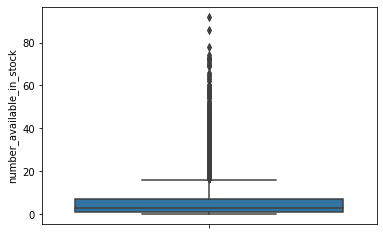

In [58]:
sns.boxplot(y='number_available_in_stock',data=df)

<AxesSubplot:ylabel='number_of_answered_questions'>

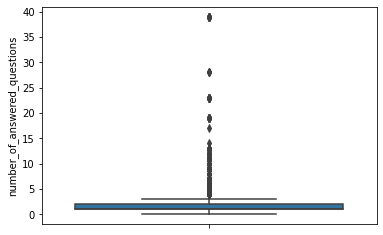

In [60]:
sns.boxplot(y='number_of_answered_questions',data=df)

<AxesSubplot:ylabel='number_of_reviews'>

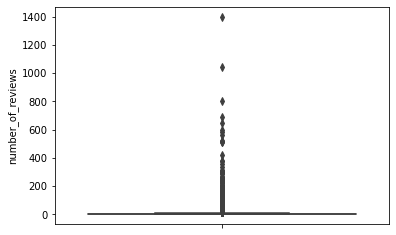

In [61]:
sns.boxplot(y='number_of_reviews',data=df)

In [83]:
toy_df = df[['uniq_id','average_review_rating','number_of_reviews','number_available_in_stock']]
toy_df.head(50)

,uniq_id,average_review_rating,number_of_reviews,number_available_in_stock
0,eac7efa5dbd3d667f26eb3d3ab504464,4,15.0,5
1,b17540ef7e86e461d37f3ae58b7b72ac,4,2.0,0
2,348f344247b0c1a935b1223072ef9d8a,3,17.0,2
3,e12b92dbb8eaee78b22965d2a9bbbd9f,5,1.0,0
4,e33a9adeed5f36840ccc227db4682a36,4,3.0,0
5,cb34f0a84102c1ebc3ef6892d7444d36,5,2.0,0
6,f74b562470571dfb689324adf236f82c,4,2.0,0
7,87bbb472ef9d90dcef140a551665c929,4,36.0,3
8,7e2aa2b4596a39ba852449718413d7cc,5,1.0,4
9,5afbaf65680c9f378af5b3a3ae22427e,4,8.0,1


In [84]:
toy_df.tail(50)

,uniq_id,average_review_rating,number_of_reviews,number_available_in_stock
9950,95f5f534ea64063c5ffd193db88d8619,4,2.0,0
9951,b1e6d7358a23b15091e422a5c064b855,4,4.0,0
9952,ccc0fceb20bce19f84841867d526e57c,5,2.0,1
9953,2adb8add8f5a6e96a775adc1e2b6516e,5,1.0,0
9954,cd6acaabf144db46457dc15157827594,4,2.0,3
9955,5c32c252a3dc4bd773e46c2b1878b686,4,9.0,10
9956,9771b4829f81e29fcf177f4488513ad7,4,6.0,5
9957,6e9b3f173b30f111cb2faa82fc3fba78,5,1.0,11
9958,62fa7a1bc38464b71ab185f149477379,5,3.0,41
9959,a8901f6d70002315796fbcab5ab14b0f,4,6.0,12


In [85]:
toy_df.sort_values('average_review_rating', ascending=False).head()

,uniq_id,average_review_rating,number_of_reviews,number_available_in_stock
5006,0c8cdff97d24335c732781f325f41f5a,5,1.0,3
4175,4612bc78680f39c6cce51009864914ad,5,1.0,36
4173,b88f588e12304d5399a47b60f304493f,5,6.0,2
4172,95802c49182f78f3e967cb324a1c4c46,5,4.0,10
8031,ae32edf0551caa17b2a2fd445467e121,5,1.0,0


In [86]:
toy_df.sort_values('number_of_reviews', ascending=False).head()

,uniq_id,average_review_rating,number_of_reviews,number_available_in_stock
9315,c30905e0fd0f5af84be16f794180559d,4,1399.0,42
8872,c751a76dd7668f78b4222b5547e7249b,4,1040.0,59
1255,26e96b522b70dac00d7069de2f42bef2,4,802.0,3
9338,45e1f2e14affc729b8c5a78d14eaf9b8,4,690.0,28
1931,f157293c89ba2e116475d555992c778a,4,649.0,0


In [87]:
toy_df.sort_values('number_available_in_stock', ascending=False).head()

,uniq_id,average_review_rating,number_of_reviews,number_available_in_stock
2497,9a2ca77772c2027f47ebdea0b0f28a12,4,30.0,92
2483,0f6b62fd7c3e3f8a50f3d95d0f3923e5,5,2.0,86
2535,dd7c20645b7a4709c17203595b49ab38,4,27.0,78
2518,6b8b5973fdecd5cf5d9c7148c8a020c2,5,1.0,74
8831,5f8c3680034a8d3725bbd721acb1d653,4,41.0,73


In [88]:
reader = Reader(rating_scale=(0,5))

data = Dataset.load_from_df(toy_df[['uniq_id', 'average_review_rating', 'average_review_rating']], reader)

# Use the famous SVD algorithm.
svd = SVD()

# Run 5-fold cross-validation and print results.

cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0307  0.0488  0.1487  0.0360  0.0998  0.0728  0.0451  
MAE (testset)     0.0116  0.0130  0.0230  0.0123  0.0165  0.0153  0.0042  
Fit time          0.41    0.40    0.40    0.40    0.40    0.40    0.00    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'test_rmse': array([0.03070436, 0.04882774, 0.14867503, 0.03596225, 0.09981868]),
 'test_mae': array([0.01156121, 0.01295046, 0.02303285, 0.01227657, 0.01651097]),
 'fit_time': (0.40593576431274414,
  0.3951241970062256,
  0.3953070640563965,
  0.4034101963043213,
  0.4013710021972656),
 'test_time': (0.008659124374389648,
  0.006254673004150391,
  0.006673336029052734,
  0.00621795654296875,
  0.006239891052246094)}

In [89]:
# Split the data into 70% / 30%
trainset, testset = train_test_split(data, test_size=.30)

# Run SVD algorithm
svd=SVD()

#Build the model
svd.fit(trainset)
predictions=svd.test(testset)

# Compute errors

accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.0863
MAE:  0.0155


0.015525143732030728

In [90]:
param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score)
print(gs.best_params)

{'rmse': 0.19521007442619767, 'mae': 0.15303373016945515}
{'rmse': {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}, 'mae': {'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.4}}


In [91]:
# GridSearch with KNNbasic

param_grid = {'min_k':[2,3,4], 'k':[5,10,20] }
gs = GridSearchCV(KNNBasic, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score)
print(gs.best_params)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi